# 卷积实验(天安门图像)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

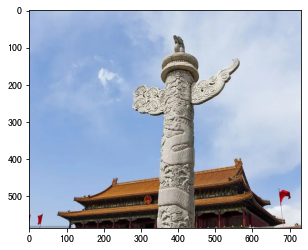

In [2]:
# 读取图像
img = cv2.imread('天安门.webp')
# imread读取的彩色图按照BGR像素存储、转换为RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.show()

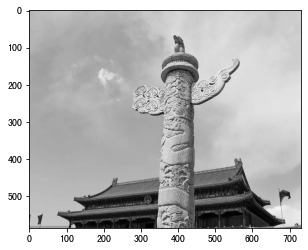

In [3]:
# 灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Normalise
grayImage = grayImage.astype('float32')/255.0
plt.imshow(grayImage, cmap='gray')
plt.show()

In [4]:
filter_vals = np.array([
  [-1, -1, 1, 1],
  [-1, -1, 1, 1],
  [-1, -1, 1, 1],
  [-1, -1, 1, 1]
])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [5]:
# 定义滤波器 filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

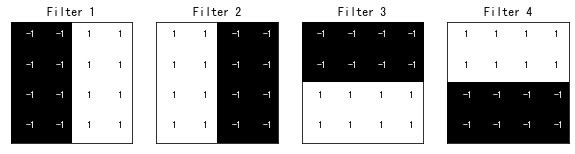

In [6]:
# 可视化filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y, x), 
                        color='white' if filters[i][x][y]<0 else 'black')

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        # 使用4个固定的filters，初始化卷积层的权重
        k_height, k_width = weight.shape[2:] # 4, 4
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        # 初始化卷积层权重
        self.conv.weight = torch.nn.Parameter(weight)
        # 定义池化层
        self.pool = nn.MaxPool2d(2,2)
        
    def forward(self, x):
        # 计算卷积层， 激活层，池化层输出
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
        
        return conv_x, activated_x, pooled_x

In [9]:
# 初始化网络，设置权重
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
weight.shape, weight

(torch.Size([4, 1, 4, 4]),
 tensor([[[[-1., -1.,  1.,  1.],
           [-1., -1.,  1.,  1.],
           [-1., -1.,  1.,  1.],
           [-1., -1.,  1.,  1.]]],
 
 
         [[[ 1.,  1., -1., -1.],
           [ 1.,  1., -1., -1.],
           [ 1.,  1., -1., -1.],
           [ 1.,  1., -1., -1.]]],
 
 
         [[[-1., -1., -1., -1.],
           [-1., -1., -1., -1.],
           [ 1.,  1.,  1.,  1.],
           [ 1.,  1.,  1.,  1.]]],
 
 
         [[[ 1.,  1.,  1.,  1.],
           [ 1.,  1.,  1.,  1.],
           [-1., -1., -1., -1.],
           [-1., -1., -1., -1.]]]]))

In [10]:
model = Net(weight)
model

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [11]:
def viz_layer(layer, n_filters=4):
    fig = plt.figure(figsize=(20, 20))
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        ax.imshow(np.squeeze(layer[0, i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

In [14]:
# 将图像转换为Tensor
gray_img_tensor = torch.from_numpy(grayImage).unsqueeze(0).unsqueeze(1)
gray_img_tensor.shape, gray_img_tensor

(torch.Size([1, 1, 585, 731]),
 tensor([[[[0.7020, 0.7020, 0.7098,  ..., 0.8118, 0.8118, 0.8157],
           [0.7020, 0.7020, 0.7098,  ..., 0.8118, 0.8118, 0.8157],
           [0.7020, 0.7020, 0.7098,  ..., 0.8118, 0.8118, 0.8157],
           ...,
           [0.6392, 0.6353, 0.6314,  ..., 0.3686, 0.3373, 0.4039],
           [0.6275, 0.6314, 0.6275,  ..., 0.2431, 0.2706, 0.1961],
           [0.6196, 0.6314, 0.6235,  ..., 0.6706, 0.6431, 0.7255]]]]))

In [15]:
# 得到卷积层的3个输出：conv_x, activated_x, pooled_x
conv_layer, activated_layer, pool_layer = model(gray_img_tensor)

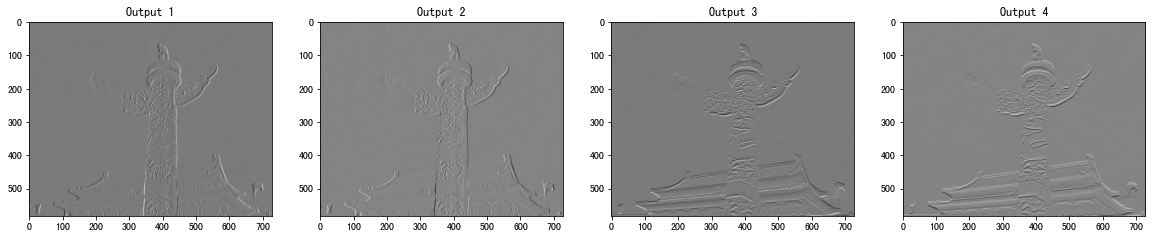

In [16]:
viz_layer(conv_layer)

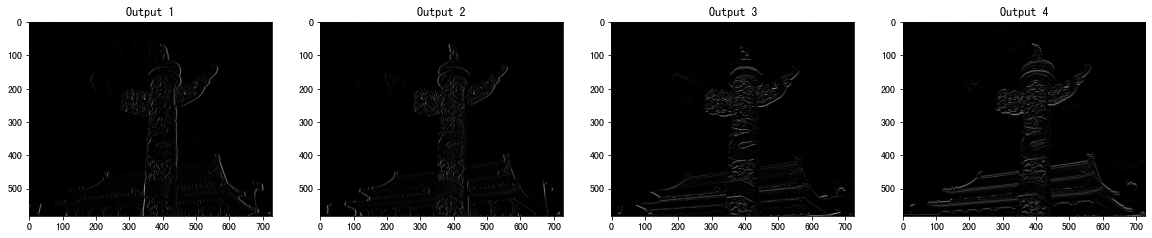

In [17]:
viz_layer(activated_layer)

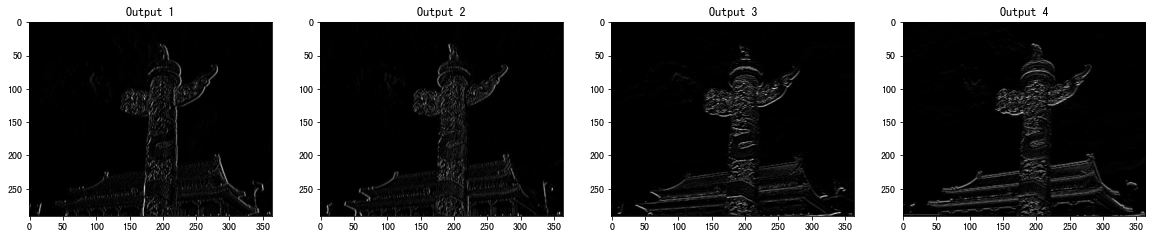

In [18]:
viz_layer(pool_layer)